<center><img src="Logo.png"/></center>

# Sommaire :

**Partie 1 :** <a href="#A1">Import librairies et fichier</a>

**Partie 2 :** <a href="#A2">Analyse descriptive</a>
- <a href="#B1">Répartition du jeu de données</a>
- <a href="#B2">Analyse univariée</a>
- <a href="#B3">Test d'homoscédasticité</a>

**Partie 3 :** <a href="#A3">Traitement des valeurs nulles</a>
- <a href="#B4">Manipulation des données</a>
- <a href="#B5">Création du modèle et prédiction</a>
- <a href="#B6">Remplacement des valeurs nulles</a>

**Partie 4 :** <a href="#A4">Création de modèles de détection de fraude</a>
- <a href="#B7">Régression logistique multiple</a>
- <a href="#B8">Méthode du Knn</a>
- <a href="#B9">Méthode du K-means</a>

**Partie 5 :** <a href="#A5">Comparatif des modèles de prédiction</a>

**Partie 6 :** <a href="#A6">Prédiction des billets test</a>
- <a href="#B10">Sauvegarde et chargement du modèle</a>
- <a href="#B11">Exécution du modèle</a>

# <a name ="A1">*Partie 1 :* Import librairies et fichier</a>

In [1]:
#Import des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import levene
import scipy.stats as stats

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from functions import *

from joblib import dump, load

In [2]:
#Import du fichier 'billets'
billets = pd.read_csv('C:/Users/Admin/Documents/Data Analyst/Projet 10 - Détectez des faux billets avec R ou Python/Data/billets.csv', sep=';')
billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


# <a name ="A2">*Partie 2 :* Analyse descriptive</a>

## <a name ="B1">1. Répartition du jeu de données</a>

In [3]:
#Informations sur le dataframe 'billets'
billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [4]:
#Création d'un dataframe avec les vrais billets
Vrai = billets.loc[billets['is_genuine']==True]
Vrai.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [5]:
print("Il y a", len(Vrai), "vrais billets dans cet échantillons.")

Il y a 1000 vrais billets dans cet échantillons.


In [6]:
Vrai.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1000 non-null   bool   
 1   diagonal      1000 non-null   float64
 2   height_left   1000 non-null   float64
 3   height_right  1000 non-null   float64
 4   margin_low    971 non-null    float64
 5   margin_up     1000 non-null   float64
 6   length        1000 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 55.7 KB


In [7]:
Vrai.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1000.000000,1000.000000,1000.00000,971.000000,1000.00000,1000.000000
mean,171.987080,103.949130,103.80865,4.116097,3.05213,113.202430
std,0.300441,0.300231,0.29157,0.319124,0.18634,0.359552
min,171.040000,103.140000,102.82000,2.980000,2.27000,111.760000
25%,171.790000,103.740000,103.61000,3.905000,2.93000,112.950000
50%,171.990000,103.950000,103.81000,4.110000,3.05000,113.205000
75%,172.200000,104.140000,104.00000,4.340000,3.18000,113.460000
max,172.920000,104.860000,104.95000,5.040000,3.74000,114.440000


In [8]:
#Création d'un dataframe avec les faux billets
Faux = billets.loc[billets['is_genuine']==False]
Faux.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1000,False,172.28,103.95,103.91,4.78,3.31,111.40
1001,False,171.92,103.86,104.30,4.96,3.13,111.29
1002,False,171.59,104.14,104.38,4.97,3.47,111.22
1003,False,172.02,104.33,104.33,5.19,3.21,111.99
1004,False,172.55,104.25,104.23,5.60,3.13,111.72


In [9]:
print("Il y a", len(Faux), "faux billets dans cet échantillons.")

Il y a 500 faux billets dans cet échantillons.


In [10]:
Faux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1000 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    500 non-null    bool   
 1   diagonal      500 non-null    float64
 2   height_left   500 non-null    float64
 3   height_right  500 non-null    float64
 4   margin_low    492 non-null    float64
 5   margin_up     500 non-null    float64
 6   length        500 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 27.8 KB


In [11]:
Faux.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,500.000000,500.000000,500.000000,492.000000,500.000000,500.000000
mean,171.901160,104.190340,104.143620,5.215935,3.350160,111.630640
std,0.306861,0.223758,0.270878,0.553531,0.180498,0.615543
min,171.040000,103.510000,103.430000,3.820000,2.920000,109.490000
25%,171.690000,104.040000,103.950000,4.840000,3.220000,111.200000
50%,171.910000,104.180000,104.160000,5.190000,3.350000,111.630000
75%,172.092500,104.332500,104.320000,5.592500,3.472500,112.030000
max,173.010000,104.880000,104.950000,6.900000,3.910000,113.850000


<AxesSubplot:xlabel='is_genuine', ylabel='count'>

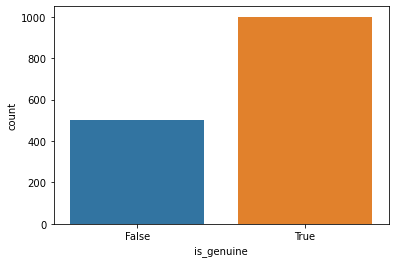

In [12]:
sns.countplot(x='is_genuine', data=billets)

## <a name ="B2">2. Analyse univariée</a>

[Text(0.5, 0, 'Type de billets'),
 Text(0, 0.5, 'Longueur du billet (en mm)'),
 Text(0.5, 1.0, 'Longueur')]

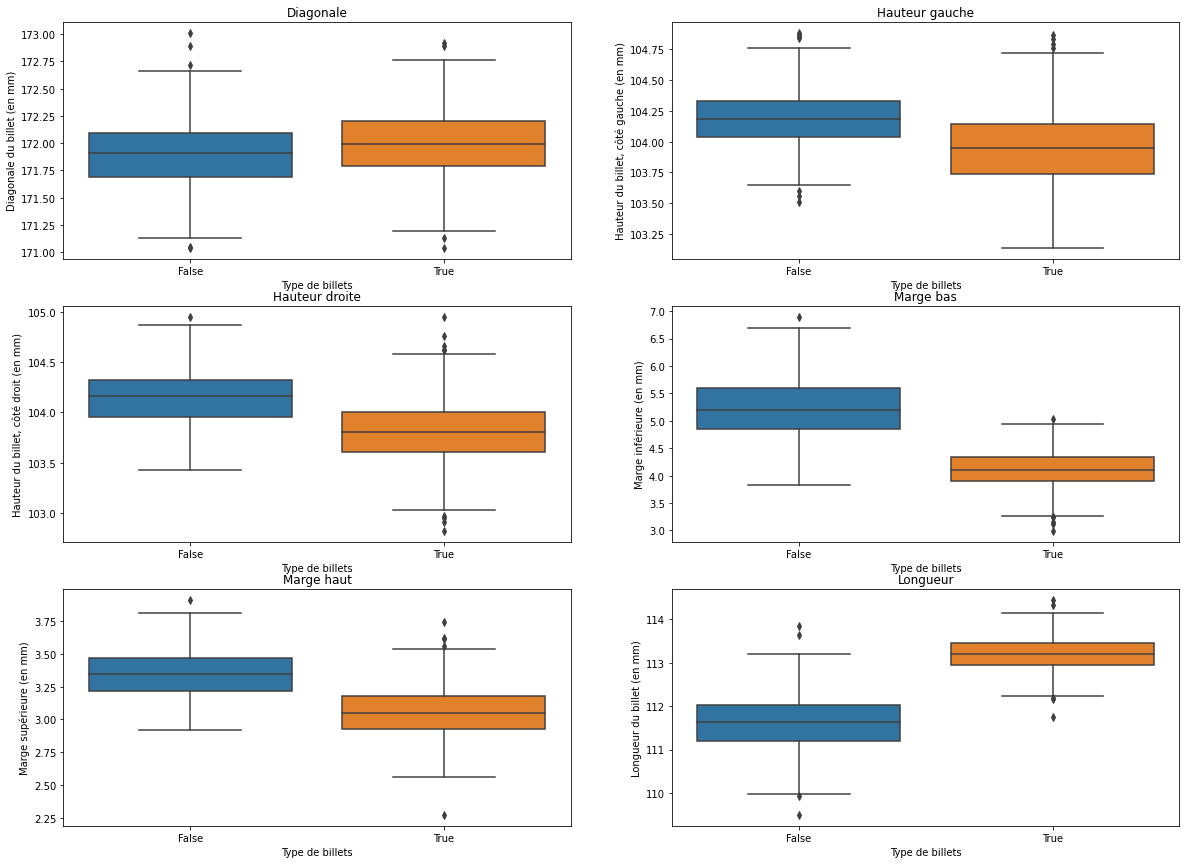

In [13]:
#Boxplots
plt.figure(figsize=(20, 20))

plt.subplot(421)
sns.boxplot(data=billets, x='is_genuine', y='diagonal').set(xlabel='Type de billets', ylabel='Diagonale du billet (en mm)', title='Diagonale')

plt.subplot(422)
sns.boxplot(data=billets, x='is_genuine', y='height_left').set(xlabel='Type de billets', ylabel='Hauteur du billet, côté gauche (en mm)', title='Hauteur gauche')

plt.subplot(423)
sns.boxplot(data=billets, x='is_genuine', y='height_right').set(xlabel='Type de billets', ylabel='Hauteur du billet, côté droit (en mm)', title='Hauteur droite')

plt.subplot(424)
sns.boxplot(data=billets, x='is_genuine', y='margin_low').set(xlabel='Type de billets', ylabel='Marge inférieure (en mm)', title='Marge bas')

plt.subplot(425)
sns.boxplot(data=billets, x='is_genuine', y='margin_up').set(xlabel='Type de billets', ylabel='Marge supérieure (en mm)', title='Marge haut')

plt.subplot(426)
sns.boxplot(data=billets, x='is_genuine', y='length').set(xlabel='Type de billets', ylabel='Longueur du billet (en mm)', title='Longueur')

Text(0.5, 1.0, 'Parallel Coordinates Plot : Comparatif des dimensions par type de billets')

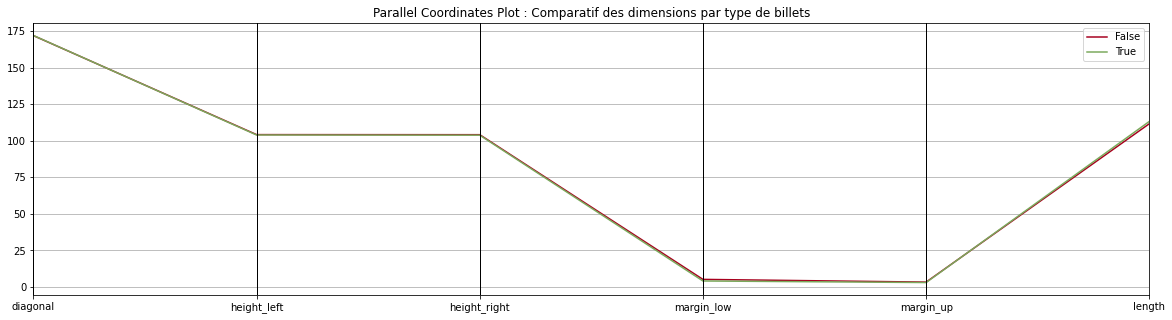

In [14]:
#Calcul moyenne dimensions par type de billet
mean_billets = billets.groupby(by=["is_genuine"]).mean()
mean_billets = mean_billets.reset_index()

#Parallel Coordinates Plot
fig, ax = plt.subplots(figsize=(20, 5))
pd.plotting.parallel_coordinates(mean_billets, 'is_genuine', color=('#A7001E', '#7AA95C'), alpha=1, ax=ax)
ax.set_title('Parallel Coordinates Plot : Comparatif des dimensions par type de billets')

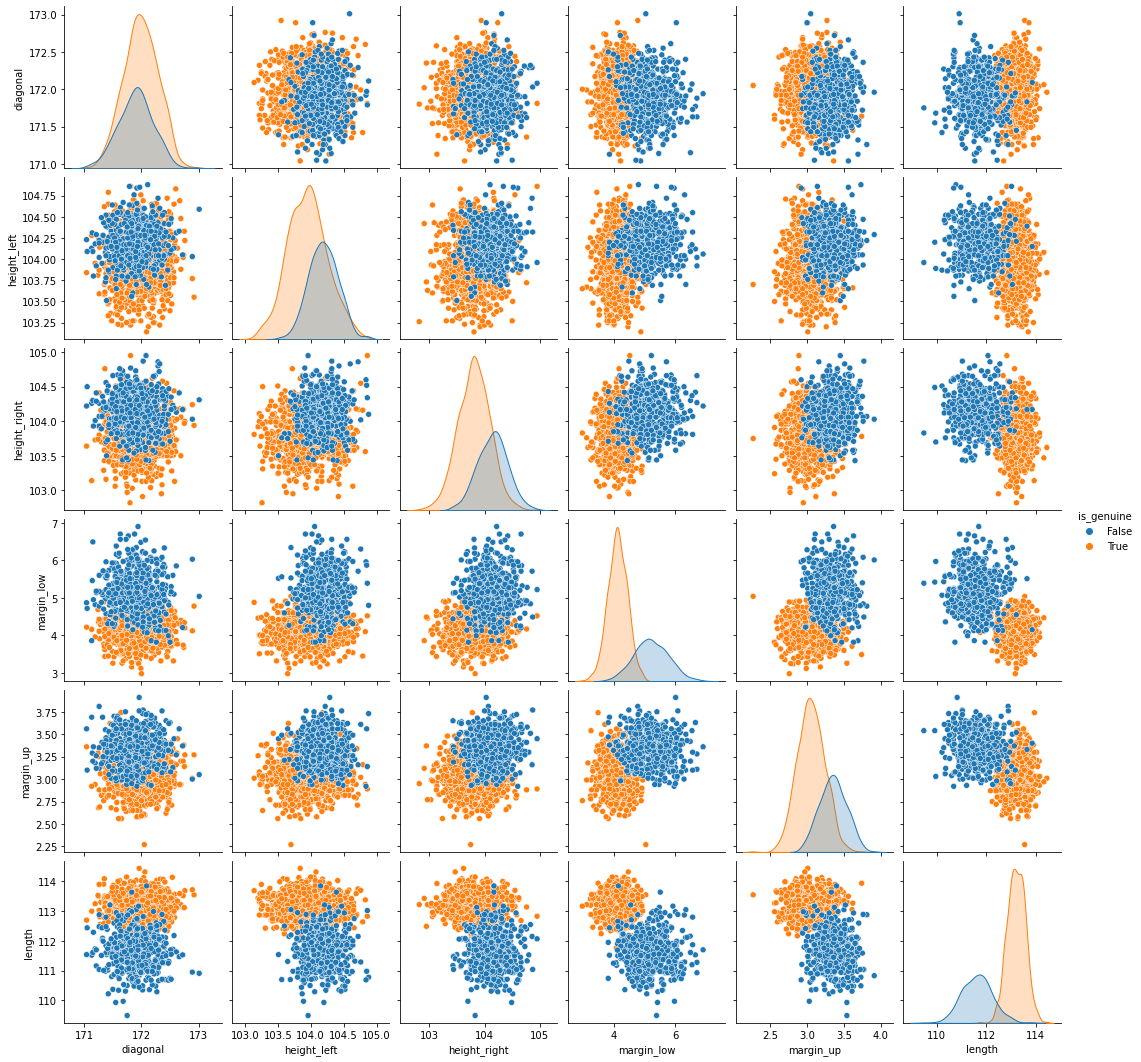

In [15]:
#Pairplot
sns.pairplot(data=billets, hue='is_genuine')

## <a name ="B3">3. Test d'homoscédasticité</a>

Nous allons maintenant réaliser un test d'homoscédasticité concernant la longueur de la diagonale pour les vrais et faux billets afin de savoir s'il y a une différence significative entre les 2 groupes et donc une corrélation entre cette dimension et la véracité d'un billet ou non.

In [16]:
#Test de Levene
gp_true = Vrai['diagonal']
gp_false = Faux['diagonal']
stat, p = levene(gp_true, gp_false)

print("La p-value est égale à", p)

if p < 0.05:
    print("Les populations n'ont pas des variances égales.")
else:
    print("Les populations ont des variances égales.")

La p-value est égale à 0.9168219593404172
Les populations ont des variances égales.


Le test de Levene indique des variances égales entre les vrais et faux billets concernant la diagonale. Cette variable apporte donc très peu d'information sur la véracité ou non d'un billet.

Cela est confirmé sur les Parallel Coordinates Plot et les Boxplot ci-dessus où les dimensions semblent très proches, mais aussi sur le Pairplot où la dispersion semble proche quelque soit le groupe.

Nous allons maintenant tester avec une variable qui semble distinguer davantage les deux groupes, la longueur du billet.

In [17]:
#Test de Levene
gp_true = Vrai['length']
gp_false = Faux['length']
stat, p = levene(gp_true, gp_false)

print("La p-value est égale à", p)

if p < 0.05:
    print("Les populations n'ont pas des variances égales.")
else:
    print("Les populations ont des variances égales.")

La p-value est égale à 2.7374687830553432e-37
Les populations n'ont pas des variances égales.


La différence est donc significative entre les 2 groupes, ce qui confirme l'impression des graphiques précédents.

# <a name ="A3">*Partie 3 :* Traitement des valeurs nulles</a>

In [18]:
#Recherche et extraction des valeurs nulles
billets_nan = billets.loc[billets['margin_low'].isna()]
billets_nan.head(5)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36


In [19]:
#Création d'une liste pour enregistrer les index des valeurs nulles
billets_nan = billets_nan.index
billets_nan = list(billets_nan)

In [20]:
print("Il y a", len(billets_nan), "valeurs nulles dans le jeu de données.")

Il y a 37 valeurs nulles nulles dans le jeu de données.


## <a name ="B4">1. Manipulation des données</a>

In [21]:
#Création dataframe pour la régression
billets_reglin = billets.copy()
#Conservation des valeurs quantitatives et non-nulles
reg_lin = billets_reglin.loc[billets['margin_low'].notna()]
reg_lin = reg_lin.drop('is_genuine', axis=1)
reg_lin.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16
3,171.36,103.91,103.94,3.62,3.01,113.51
4,171.73,104.28,103.46,4.04,3.48,112.54


In [22]:
#Affichage de la matrice des corrélations
reg_lin.corr()

,diagonal,height_left,height_right,margin_low,margin_up,length
diagonal,1.000000,0.018265,-0.019428,-0.111534,-0.059147,0.100758
height_left,0.018265,1.000000,0.235132,0.302643,0.243812,-0.314344
height_right,-0.019428,0.235132,1.000000,0.391085,0.306867,-0.404272
margin_low,-0.111534,0.302643,0.391085,1.000000,0.431606,-0.666753
margin_up,-0.059147,0.243812,0.306867,0.431606,1.000000,-0.521139
length,0.100758,-0.314344,-0.404272,-0.666753,-0.521139,1.000000


## <a name ="B5">2. Création du modèle et prédiction</a>

In [23]:
#Affectation des variables explicatives et de la variable expliquée
X = reg_lin[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
y = reg_lin['margin_low']

In [24]:
#Standardisation des variables explicatives
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [25]:
#Ajout d'une constante aux variables explicatives
X_standardized = sm.add_constant(X_standardized)

In [26]:
#Entraînement du modèle de régression
model = sm.OLS(y, X_standardized).fit()  #Modèle OLS = Méthode des Moindres Carrés

In [27]:
model

In [28]:
#Résumé des résultats du modèle
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Thu, 25 May 2023   Prob (F-statistic):          2.60e-202
Time:                        14:24:17   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4860      0.013    356.926      0.0

In [29]:
#Calcul des prédictions
y_pred = model.predict(X_standardized)

In [30]:
#Calcul des métriques d'évaluation (RMSE et R²)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print("Le RMSE (Root Mean Squared Error), ou Erreur Quadratique Moyenne, est de ", rmse)
print("Le R², ou Coefficient de Détermination, est de ", r2)

Le RMSE (Root Mean Squared Error), ou Erreur Quadratique Moyenne, est de  0.4797423242719386
Le R², ou Coefficient de Détermination, est de  0.4773366973063955


Le RMSE, qui mesure l'erreur de prédiction du modèle, étant relativement faible, de 0.479, on peut considérer que les écarts des prédictions par rapport à la réalité sont assez faibles.

Le R² étant de 0.477, cela signifie que 47.7% de de la variable est expliquée par le modèle. Cela représente moins de la moitié, ce qui est assez peu.

In [31]:
#Test de Shapiro-Wilk pour vérifier la normalité des résidus
residuals = model.resid
shapiro_stat, shapiro_p = shapiro(residuals)
print("Test de Shapiro-Wilk: statistic =", shapiro_stat)
print("p-value =", shapiro_p)

Test de Shapiro-Wilk: statistic = 0.9857879281044006
p-value = 8.536943374437556e-11


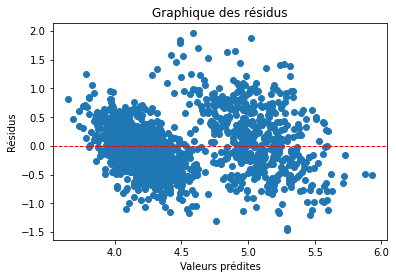

In [32]:
#Affichage du graphique des résidus
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.title("Graphique des résidus")
plt.show()

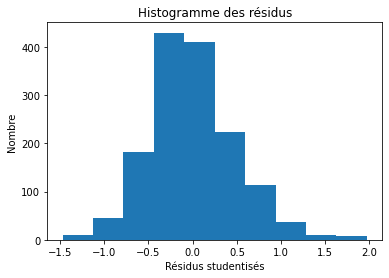

In [33]:
#Histogramme des résidus
plt.hist(residuals)
plt.ylabel('Nombre')
plt.xlabel('Résidus studentisés')
plt.title('Histogramme des résidus')
plt.show()

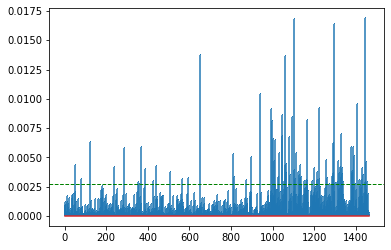

In [34]:
#Distance de Cook
influence = model.get_influence()
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",") 
plt.axhline(y=4/len(y),color="g",linewidth=1,linestyle="--") 
plt.show()

## <a name ="B6">3. Remplacement des valeurs nulles</a>

In [35]:
#Identification des valeurs 'margin_low' manquantes
missing_margin_low = billets_reglin['margin_low'].isna()

In [36]:
#Récupération des données explicatives des variables manquantes
X_missing = billets_reglin[missing_margin_low][['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]

In [37]:
# Standardiser les variables indépendantes manquantes
X_missing_standardized = scaler.transform(X_missing)

In [38]:
#Ajouter d'une constante aux variables indépendantes
X_missing_standardized = sm.add_constant(X_missing_standardized)

In [39]:
#Utilisation du modèle pour prédire les valeurs manquantes
predicted_margin_low = model.predict(X_missing_standardized)

In [40]:
#Remplacement des valeurs manquantes par les valeurs prédites
billets.loc[missing_margin_low, 'margin_low'] = predicted_margin_low

In [41]:
#Vérification de l'affectation des valeurs
billets.iloc[billets_nan].head(5)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,4.318525,3.25,112.79
99,True,171.93,104.07,104.18,4.393668,3.14,113.08
151,True,172.07,103.80,104.38,4.410457,3.02,112.93
197,True,171.45,103.66,103.80,4.319014,3.62,113.27
241,True,171.83,104.14,104.06,4.650617,3.02,112.36


In [42]:
billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


# <a name ="A4">*Partie 4 :* Création de modèles de détection de fraude</a>

## <a name ="B7">1. Régression logistique multiple</a>

In [43]:
print("Pour réaliser notre régression logistique, nous allons séparer notre jeu de données en un jeu d'apprentissage qui permettra de créer un modèle, et un jeu test qui permettra de mesurer l'efficacité de ce modèle. Nous utiliserons 80% de la base de données pour faire apprendre le modèle, c'est-à-dire qu'il s'exercera sur", round(len(billets)*0.8), "individus.")

Pour réaliser notre régression logistique, nous allons séparer notre jeu de données en un jeu d'apprentissage qui permettra de créer un modèle, et un jeu test qui permettra de mesurer l'efficacité de ce modèle. Nous utiliserons 80% de la base de données pour faire apprendre le modèle, c'est-à-dire qu'il s'exercera sur 1200 individus.


In [44]:
#Isolation des variables explicatives et de la variable cible
X = billets[['diagonal', 'height_left', 'height_right', 'margin_up', 'margin_low', 'length']]
Y = billets['is_genuine']

Y.value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

In [45]:
#Séparation des données en données d'entraînement et de test
X_train, X_test, y_train, y_test_rl = train_test_split(X, Y, test_size=0.2, random_state=0)

In [46]:
#Opération de centrage-réduction
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test

array([[ 2.06615973,  0.4778575 , -2.43469958,  0.08556612,  0.2282285 ,
         0.43242216],
       [ 1.70455507,  0.13663227,  0.30931869,  0.43377926, -0.67435044,
         0.89140814],
       [-1.58276004,  0.40961245, -0.30731463,  0.95609895,  0.21318551,
        -0.69209348],
       ...,
       [-0.53081921, -1.1600236 , -0.73895795, -1.65549954, -1.26102675,
         0.12260663],
       [ 0.78410684,  2.04749355,  1.60424866,  0.95609895,  1.17593638,
        -1.95430491],
       [-1.12253593, -0.34108305, -1.57141294, -0.87201999, -0.05758817,
         0.59306725]])

In [47]:
#Construction du modèle
model_reg = LogisticRegression(random_state=0, solver='liblinear')
model_reg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [48]:
#Prédiction du groupe-test et évaluation du modèle
y_pred_rl = model_reg.predict(X_test)
eval = model_reg.score(X_test, y_test_rl)

In [49]:
print("Le modèle est fiable à", round(eval*100,2), "%")

Le modèle est fiable à 99.33 %


In [50]:
#Résultat des prédictions
print(classification_report(y_test_rl, y_pred_rl))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99        97
        True       1.00      1.00      1.00       203

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



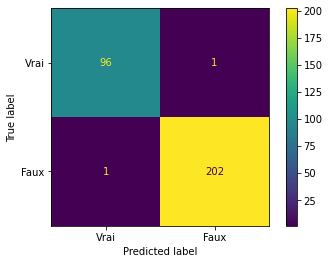

In [51]:
#Matrice de confusion
confusion_matrix = metrics.confusion_matrix(y_test_rl, y_pred_rl)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Vrai', 'Faux'])

cm_display.plot()

## <a name ="B8">2. Méthode du Knn</a>

### a) Création du modèle et entraînement des données

In [52]:
#Isolation des variables explicatives et de la variable cible
X = billets[['diagonal', 'height_left', 'height_right', 'margin_up', 'margin_low', 'length']]
Y = billets['is_genuine']

In [53]:
#Séparation des données en données d'entraînement et de test
X_train, X_test, y_train, y_test_knn = train_test_split(X, Y, test_size=0.2, random_state=0)

In [54]:
#Instanciation du modèle
sc = StandardScaler()
#Entraînement du modèle
sc.fit(X_train)

StandardScaler()

In [55]:
#transformation des données
X_train_norm = sc.transform(X_train)
X_test_norm = sc.transform(X_test)

In [56]:
#Enregistrement du nom des colonnes
column_list = X_train.columns

In [57]:
#Création de nouveaux dataframes
X_train_scaled = pd.DataFrame(data=X_train_norm, columns=column_list)
X_test_scaled = pd.DataFrame(data=X_test_norm, columns=column_list)

In [58]:
X_train_scaled.head()

,diagonal,height_left,height_right,margin_up,margin_low,length
0,-0.267834,-2.149577,-0.307315,-0.915547,-0.644264,0.397998
1,0.455375,0.102510,-0.060661,0.738466,-0.779651,0.478321
2,0.323883,0.273122,0.679299,-1.829606,0.363615,0.719288
3,1.704555,-0.716431,-1.016443,-1.655500,-0.960167,0.570118
4,0.192390,0.000142,-0.769790,0.129093,-0.884952,-0.072462


### b) Choix du nombre de K

In [59]:
#Création de la fonction
vect_error = []

for k in range (1,20):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train_scaled, y_train)
    y_pred_knn = KNN.predict(X_test_scaled)
    error = np.mean(y_pred_knn != y_test_knn)
    vect_error.append(error)

In [60]:
#Affichage des pourcentages d'erreur
vect_error

[0.02666666666666667,
 0.03,
 0.016666666666666666,
 0.02,
 0.01,
 0.01,
 0.01,
 0.01,
 0.013333333333333334,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01]

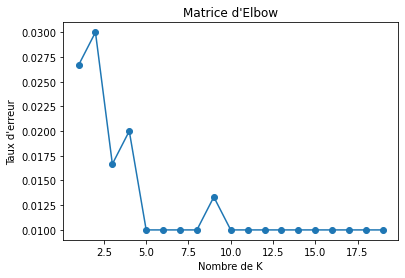

In [61]:
#Graphique
plt.plot(range(1,20), vect_error, marker = 'o')
plt.title("Matrice d'Elbow")
plt.xlabel('Nombre de K')
plt.ylabel("Taux d'erreur")

plt.show()

In [62]:
minimum = np.argmin(vect_error) +1
print("Le K idéal est de", minimum, "voisins.")

Le K idéal est de 5 voisins.


### c) Prédiction et évaluation du modèle

In [63]:
#Choix du nombre de K
KNN = KNeighborsClassifier(n_neighbors = 5)

In [64]:
#Entraînement du modèle
KNN.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [65]:
#Prédiction des individus-test
y_pred_knn = KNN.predict(X_test_scaled)

In [66]:
#Résultat des prédictions
print(classification_report(y_test_knn, y_pred_knn))

              precision    recall  f1-score   support

       False       0.99      0.98      0.98        97
        True       0.99      1.00      0.99       203

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



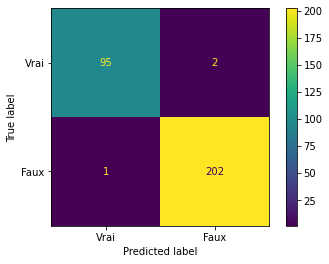

In [67]:
#Matrice de confusion
confusion_matrix = metrics.confusion_matrix(y_test_knn, y_pred_knn)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Vrai', 'Faux'])

cm_display.plot()

## <a name ="B9">3. Méthode du K-means</a>

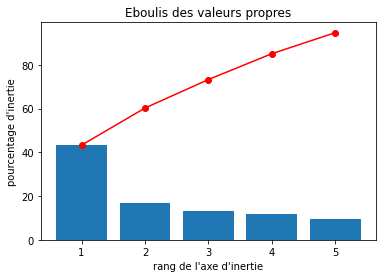

In [68]:
#Choix du nombre de composantes à calculer
n_comp = 5

#Import de l'échantillon
data_pca = billets[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up','length']]

#Préparation des données pour l'ACP
X = data_pca.values
features = data_pca.columns

#Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

#Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

#Eboulis des valeurs propres
display_scree_plot(pca)

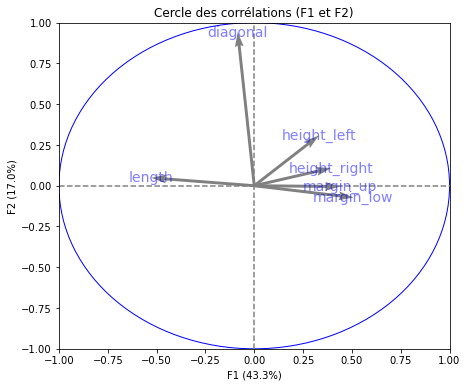

In [69]:
#Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

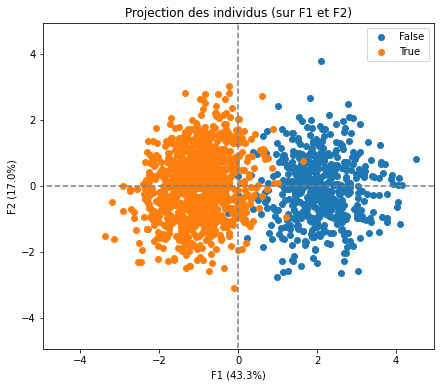

In [70]:
#Projection des individus
X_proj = pca.transform(X_scaled)

display_factorial_planes(X_proj, n_comp, pca, [(0,1)], illustrative_var=billets['is_genuine'])

plt.show()

In [71]:
#Isolation des variables explicatives et de la variable cible
X = billets[['diagonal', 'height_left', 'height_right', 'margin_up', 'margin_low', 'length']]
Y = billets['is_genuine']

In [72]:
#Séparation des données en données d'entraînement et de test
X_train, X_test, y_train, y_test_km = train_test_split(X, Y, test_size=0.2, random_state=0)

In [73]:
#Entrainement du modèle K-means
km = KMeans(n_clusters=2, random_state=110)
km.fit(X_train)

KMeans(n_clusters=2, random_state=110)

In [74]:
#Affichage des prédictions
y_pred_km = km.predict(X_test)
y_pred_km

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1])

In [75]:
y_test_km

471      True
9        True
1499    False
54       True
1411    False
        ...  
220      True
946      True
992      True
1496    False
443      True
Name: is_genuine, Length: 300, dtype: bool

In [76]:
#Résultat des prédictions
print(classification_report(y_test_km, y_pred_km))

              precision    recall  f1-score   support

       False       1.00      0.97      0.98        97
        True       0.99      1.00      0.99       203

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.99       300
weighted avg       0.99      0.99      0.99       300



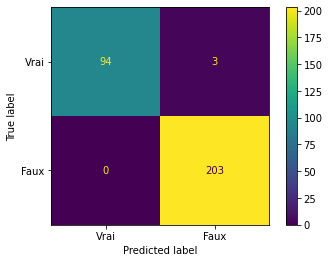

In [77]:
#Matrice de confusion
confusion_matrix = metrics.confusion_matrix(y_test_km, y_pred_km)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Vrai', 'Faux'])

cm_display.plot()

# <a name ="A5">*Partie 5 :* Comparatif des modèles de prédiction</a>

Nous allons maintenant analyser différents indicateurs qui nous permettront de comparer les 3 modèles créés ci-dessus.

Ces 4 indicateurs sont :
- *Exactitude (ou Accuracy) :* pourcentage total de prédictions bien effectuées
- *Rappel (ou Recall) :* pourcentage de billets positifs bien prédits par notre modèle. Plus il est haut, plus les faux négatifs sont évités
- *Précision :* nombre de prédictions positives bien effectuées. Plus il est haut, plus les faux positifs sont évitées
- *Score F1 :* évaluation de la performance du modèle qui combine recall et précision

- **Régression logistique**

In [78]:
#Calcul des indicateurs
exactitude_rl = accuracy_score(y_test_rl, y_pred_rl)
rappel_rl = recall_score(y_test_rl, y_pred_rl)
precision_rl = precision_score(y_test_rl, y_pred_rl)
f1_rl = f1_score(y_test_rl, y_pred_rl)

In [79]:
#Affichage des résultats
print("Exactitude :", round(exactitude_rl,4))
print("Rappel :", round(rappel_rl,4))
print("Précision :", round(precision_rl,4))
print("Score F1 :", round(f1_rl,4))

Exactitude : 0.9933
Rappel : 0.9951
Précision : 0.9951
Score F1 : 0.9951


- **Modèle du Knn**

In [80]:
#Calcul des indicateurs
exactitude_knn = accuracy_score(y_test_knn, y_pred_knn)
rappel_knn = recall_score(y_test_knn, y_pred_knn)
precision_knn = precision_score(y_test_knn, y_pred_knn)
f1_knn = f1_score(y_test_knn, y_pred_knn)

In [81]:
#Affichage des résultats
print("Exactitude :", round(exactitude_knn,4))
print("Rappel :", round(rappel_knn,4))
print("Précision :", round(precision_knn,4))
print("Score F1 :", round(f1_knn,4))

Exactitude : 0.99
Rappel : 0.9951
Précision : 0.9902
Score F1 : 0.9926


- **Modèle du K-means**

In [82]:
#Calcul des indicateurs
exactitude_km = accuracy_score(y_test_km, y_pred_km)
rappel_km = recall_score(y_test_km, y_pred_km)
precision_km = precision_score(y_test_km, y_pred_km)
f1_km = f1_score(y_test_km, y_pred_km)

In [83]:
#Affichage des résultats
print("Exactitude :", round(exactitude_km,4))
print("Rappel :", round(rappel_km,4))
print("Précision :", round(precision_km,4))
print("Score F1 :", round(f1_km,4))

Exactitude : 0.99
Rappel : 1.0
Précision : 0.9854
Score F1 : 0.9927


In [84]:
ar = np.array([[exactitude_rl, exactitude_knn, exactitude_km], [rappel_rl, rappel_knn, rappel_km], [precision_rl, precision_knn, precision_km], [f1_rl, f1_knn, f1_km]])
comparatif = pd.DataFrame(ar, index = ['Exactitude', 'Rappel', 'Précision', 'Score F1'], columns = ['Régression logitistique', 'Méthode Knn', 'Méthode K-means'])
comparatif

,Régression logitistique,Méthode Knn,Méthode K-means
Exactitude,0.993333,0.990000,0.990000
Rappel,0.995074,0.995074,1.000000
Précision,0.995074,0.990196,0.985437
Score F1,0.995074,0.992629,0.992665


Pour l'ensemble des indicateurs qui nous ont permis de mesurer la fiabilité des différents indicateurs, la méthode de régression logistique est toujours celle qui est la mieux évaluée. Nous allons donc la sauvegarder.

# <a name ="A6">*Partie 6 :* Prédiction des billets test</a>

## <a name ="B10">1. Sauvegarde et chargement du modèle</a>

In [85]:
#Sauvegarde du modèle en interne
dump(model_reg, 'model_billets.joblib')

['model_billets.joblib']

In [86]:
#Chargement du modèle
model = load('model_billets.joblib')

## <a name ="B11">2. Exécution du modèle</a>

In [87]:
#Chargement et affichage des données test
billets_test = pd.read_csv('Data/billets_test.csv')
billets_test

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5


In [88]:
#Définition de la fonction
def predict_billets(df):
    X = df[['diagonal','height_left','height_right','margin_low', 'margin_up','length']]
    X_fit = sc.fit_transform(X)
    pred_X = model.predict(X_fit)
    pred_proba = model.predict_proba(X_fit)[:,1]
    df['prediction'] = pred_X
    df['proba'] = pred_proba
    
    return df

In [89]:
#Exécution de la fonction
predict_billets(billets_test)

,diagonal,height_left,height_right,margin_low,margin_up,length,id,prediction,proba
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1,True,0.999964
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2,False,0.157438
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3,True,0.999731
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4,False,0.000198
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5,True,0.631429
